Importing the necessary libraries

In [1]:
# Generic Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Training related Libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [3]:

pd.set_option('display.max_rows',300)
pd.set_option('display.max_columns', 300)

In [4]:
#Reading the data into a dataframe from the csv

df_bs = pd.read_csv(r'day.csv', low_memory = False)

## Data Understanding and Cleaning
We will try and understand the data and take the necessary steps to clean data as required

In [5]:
df_bs.shape

(730, 16)

In [6]:
df_bs.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
df_bs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


Missing Values

In [8]:
# Check missing values. (None)
df_bs.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
#Check for columns with one distinct value. Can be removed.
#Also one distinct value for each record can be removed. (None)
df_bs.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

### Observations
As per the above we can ignore 'instant', 'dteday'. 
Also since all relevant features from dteday are extracted in separate columns we can ignore.

In [10]:
df_bs.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [11]:
#instant and dteday as mentioned above can ignored and deleted. 
#casual and registered columns can be dropped since the sum is present in cnt column.

ignore_cols = ["instant", "dteday", "casual","registered"]

In [12]:
df_bs.drop(columns=ignore_cols, inplace = True)
df_bs.shape

(730, 12)

In [13]:
df_bs.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Checking the value counts and Mappig Categorical columns to values

#### Mapping values to day names in a week, adding a new column

In [14]:
# Check value counts 
df_bs['weekday'].value_counts()

6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64

In [15]:
def weekday_map(x):
    return x.map({1:'Mon', 2:'Tue', 3:'Wed', 4:'Thurs', 5:'Fri', 6:'Sat', 0:'Sun'})

df_bs[['weekday']] = df_bs[['weekday']].apply(weekday_map)


In [16]:
df_bs.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,Sat,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,Sun,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,Mon,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,Tue,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,Wed,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,1,0,1,0,Thurs,1,1,8.378268,11.66045,51.8261,6.000868,1606
6,1,0,1,0,Fri,1,2,8.057402,10.44195,49.8696,11.304642,1510
7,1,0,1,0,Sat,0,2,6.765000,8.11270,53.5833,17.875868,959
8,1,0,1,0,Sun,0,1,5.671653,5.80875,43.4167,24.250650,822
9,1,0,1,0,Mon,1,1,6.184153,7.54440,48.2917,14.958889,1321


#### Similarly checking distinct value counts and mapping values for Month Name

In [17]:
# Check value counts 
df_bs['mnth'].value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [18]:
def month_map(x):
    return x.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'})

df_bs[['mnth']] = df_bs[['mnth']].apply(month_map)


In [19]:
df_bs.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,Jan,0,Sat,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,Jan,0,Sun,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,Jan,0,Mon,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,Jan,0,Tue,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,Jan,0,Wed,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,1,0,Jan,0,Thurs,1,1,8.378268,11.66045,51.8261,6.000868,1606
6,1,0,Jan,0,Fri,1,2,8.057402,10.44195,49.8696,11.304642,1510
7,1,0,Jan,0,Sat,0,2,6.765000,8.11270,53.5833,17.875868,959
8,1,0,Jan,0,Sun,0,1,5.671653,5.80875,43.4167,24.250650,822
9,1,0,Jan,0,Mon,1,1,6.184153,7.54440,48.2917,14.958889,1321


#### Similarly checking distinct value counts and mapping values for Season Name

In [20]:
# Check value counts 
df_bs['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [21]:
# Mapping as per data dictionary
def season_map(x):
    return x.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})

df_bs[['season']] = df_bs[['season']].apply(season_map)


In [22]:
df_bs.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Sat,0,2,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,2,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tue,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,Spring,0,Jan,0,Thurs,1,1,8.378268,11.66045,51.8261,6.000868,1606
6,Spring,0,Jan,0,Fri,1,2,8.057402,10.44195,49.8696,11.304642,1510
7,Spring,0,Jan,0,Sat,0,2,6.765000,8.11270,53.5833,17.875868,959
8,Spring,0,Jan,0,Sun,0,1,5.671653,5.80875,43.4167,24.250650,822
9,Spring,0,Jan,0,Mon,1,1,6.184153,7.54440,48.2917,14.958889,1321


#### Similarly checking distinct value counts and mapping values for Weather Situation

In [23]:
# Check value counts 
df_bs['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [24]:
# Mapping as per data dictionary
def weathersit_map(x):
    return x.map({1:'Clear', 2:'Mist', 3:'Lightrain', 4:'Heavyrain'})

df_bs[['weathersit']] = df_bs[['weathersit']].apply(weathersit_map)


In [25]:
df_bs.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
5,Spring,0,Jan,0,Thurs,1,Clear,8.378268,11.66045,51.8261,6.000868,1606
6,Spring,0,Jan,0,Fri,1,Mist,8.057402,10.44195,49.8696,11.304642,1510
7,Spring,0,Jan,0,Sat,0,Mist,6.765000,8.11270,53.5833,17.875868,959
8,Spring,0,Jan,0,Sun,0,Clear,5.671653,5.80875,43.4167,24.250650,822
9,Spring,0,Jan,0,Mon,1,Clear,6.184153,7.54440,48.2917,14.958889,1321


In [26]:
df_bs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


### Target Variable - cnt
### Categorical Variables
1. yr
2. mnth
3. holiday
4. weekday
5. workingday
6. weathersit 
7. season

### Continuous Variables
1. temp
2. atemp
3. hum
4. windspeed


### Data Visualisation

In [27]:
cat_cols = ['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'season'] 
num_cols = ['temp', 'atemp','hum', 'windspeed','cnt']

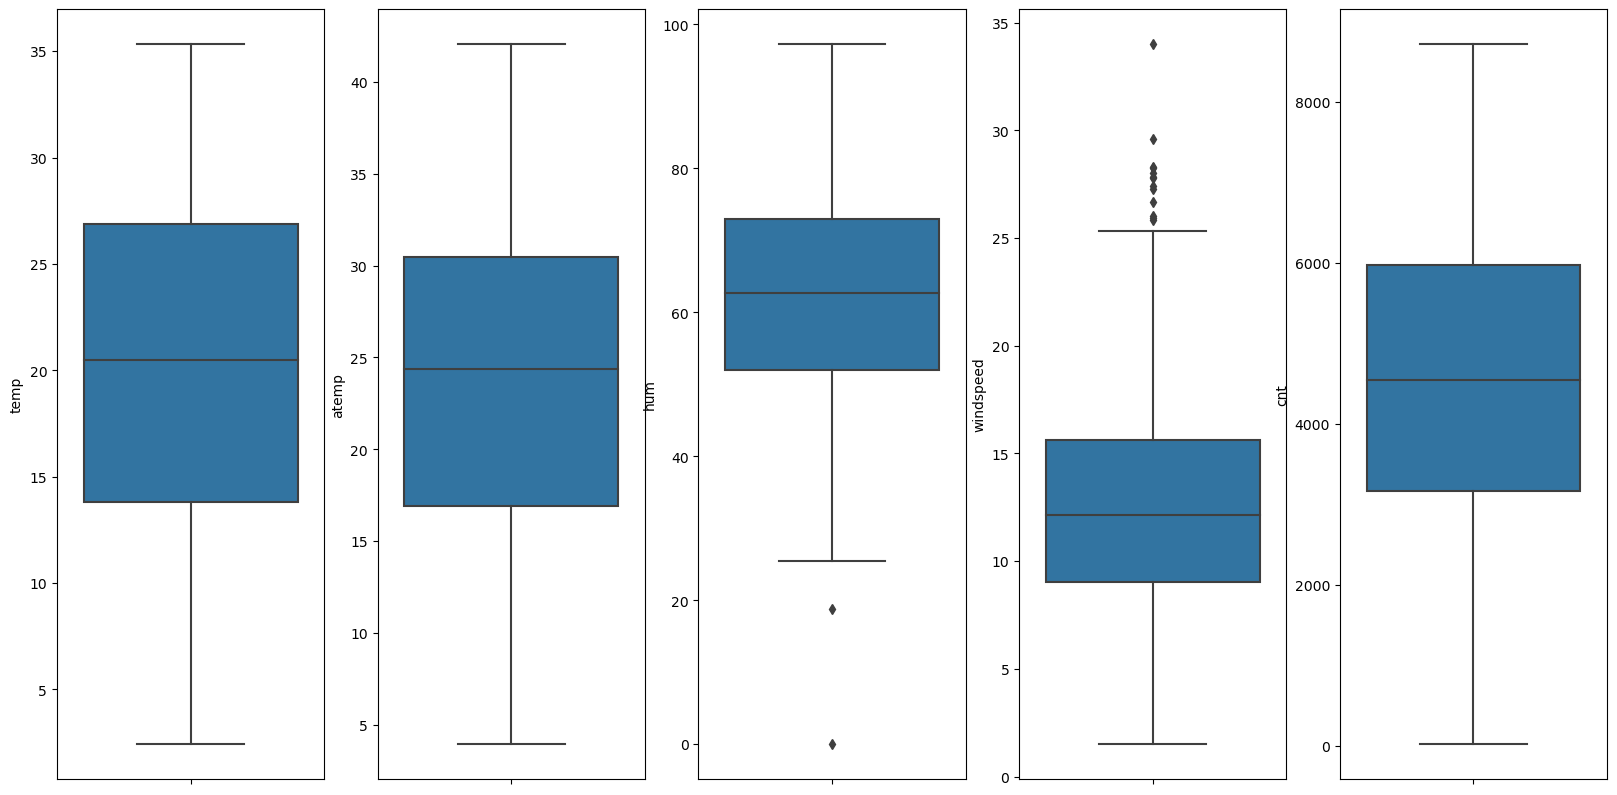

In [29]:
# Box plots for continuos variables
plt.figure(figsize = (20,10))

i = 1
for col in num_cols:
    plt.subplot(1,5,i)
    sns.boxplot(y = col , data = df_bs)
    i = i + 1

### Observations
1. No major outliers. Can leave as is.

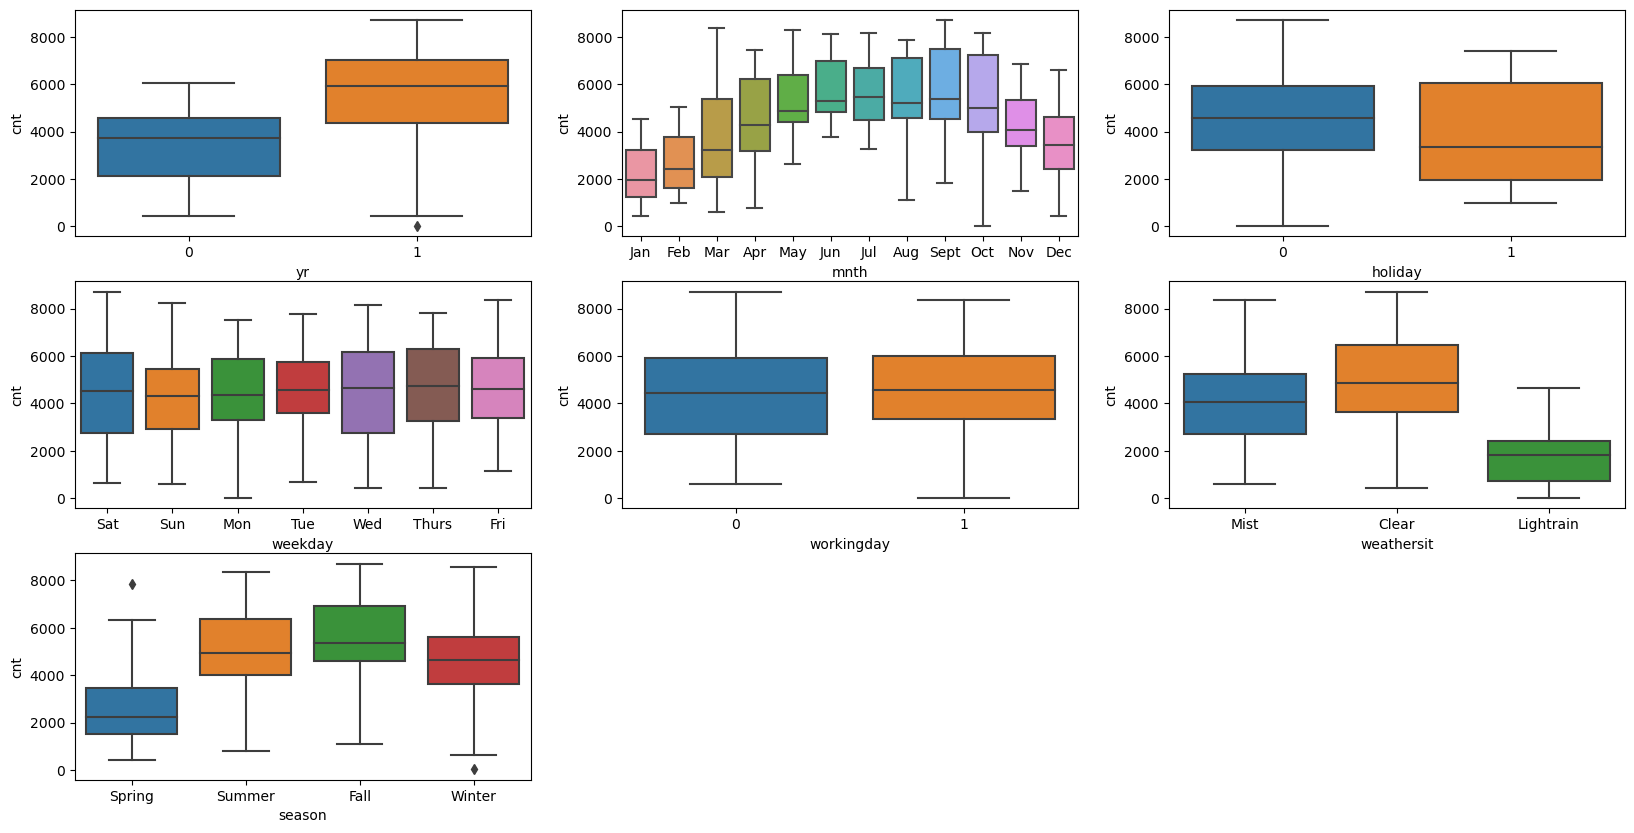

In [30]:
# Box plots for continuos variables against target
plt.figure(figsize = (20,10))

i = 1
for col in cat_cols:
    plt.subplot(3,3,i)
    sns.boxplot(y = 'cnt', x = col , data = df_bs)
    i = i + 1

### Observations 
1. 2019 has higher demand than 2018.
2. Month Wise demand remains high from Jun until Oct.
3. Maximum demand in Fall Season and on clear weather sitation.
4. Nothing conclusive for weekday or working day.

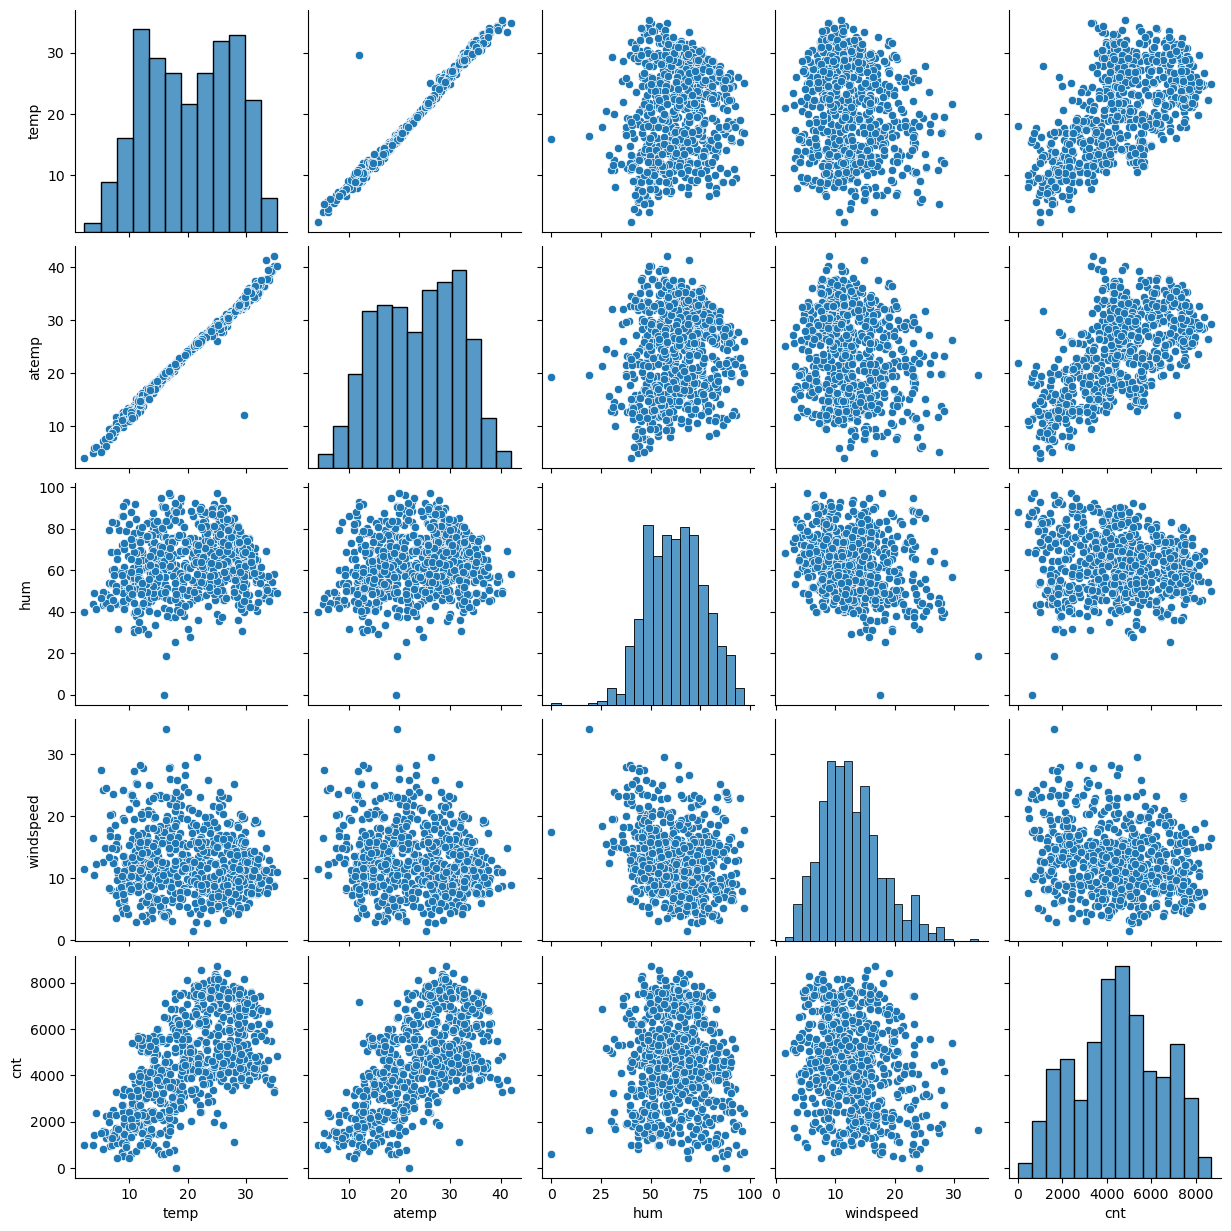

In [32]:
# Pair Plots to see linearity in continuous columns
sns.pairplot(data = df_bs[num_cols])
plt.show()

### Observations
A linear relationship can be clearly seen between temp, atemp and the target variable cnt. No linearity visible of the cnt variable with the rest.
Also atemp and temp are highly correlated with each other.

<Axes: >

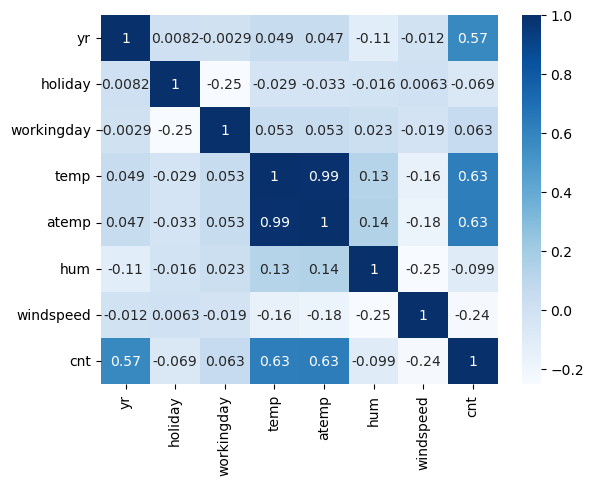

In [33]:
# Heat Map for correlation
sns.heatmap(data = df_bs.corr(), cmap = 'Blues', annot =True)

### Observations
1. temp and atemp have a very high correlation (.99). One can be dropped.(Retaining temp)
2. Windspeed, Hum and Holiday have a negative correlation with the target.

In [34]:
df_bs.shape

(730, 12)

In [35]:
df_bs.drop(columns='atemp', inplace = True)
df_bs.shape

(730, 11)

In [37]:
df_bs.head(20)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,Jan,0,Sat,0,Mist,14.110847,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,Mist,14.902598,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600
5,Spring,0,Jan,0,Thurs,1,Clear,8.378268,51.8261,6.000868,1606
6,Spring,0,Jan,0,Fri,1,Mist,8.057402,49.8696,11.304642,1510
7,Spring,0,Jan,0,Sat,0,Mist,6.765000,53.5833,17.875868,959
8,Spring,0,Jan,0,Sun,0,Clear,5.671653,43.4167,24.250650,822
9,Spring,0,Jan,0,Mon,1,Clear,6.184153,48.2917,14.958889,1321


## Data Preparation for Linear Regression Model

### Dummy Variables for categorical columns

In [38]:
# Yr and Holiday are already in 0,1 format. All rest must be converted to integers.
cat_cols_dummy = ['season', 'mnth', 'weathersit', 'weekday']
df_bs_dummy_data = df_bs[cat_cols_dummy]
df_bs_cat_dummy = pd.get_dummies(df_bs_dummy_data, drop_first = True)

In [39]:
df_bs_cat_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   season_Spring         730 non-null    uint8
 1   season_Summer         730 non-null    uint8
 2   season_Winter         730 non-null    uint8
 3   mnth_Aug              730 non-null    uint8
 4   mnth_Dec              730 non-null    uint8
 5   mnth_Feb              730 non-null    uint8
 6   mnth_Jan              730 non-null    uint8
 7   mnth_Jul              730 non-null    uint8
 8   mnth_Jun              730 non-null    uint8
 9   mnth_Mar              730 non-null    uint8
 10  mnth_May              730 non-null    uint8
 11  mnth_Nov              730 non-null    uint8
 12  mnth_Oct              730 non-null    uint8
 13  mnth_Sept             730 non-null    uint8
 14  weathersit_Lightrain  730 non-null    uint8
 15  weathersit_Mist       730 non-null    uint8
 16  weekday_

### Concatenate dummy data with main and drop original columns

In [40]:
df_bs = pd.concat([df_bs, df_bs_cat_dummy], axis = 1 )

In [41]:
df_bs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   season                730 non-null    object 
 1   yr                    730 non-null    int64  
 2   mnth                  730 non-null    object 
 3   holiday               730 non-null    int64  
 4   weekday               730 non-null    object 
 5   workingday            730 non-null    int64  
 6   weathersit            730 non-null    object 
 7   temp                  730 non-null    float64
 8   hum                   730 non-null    float64
 9   windspeed             730 non-null    float64
 10  cnt                   730 non-null    int64  
 11  season_Spring         730 non-null    uint8  
 12  season_Summer         730 non-null    uint8  
 13  season_Winter         730 non-null    uint8  
 14  mnth_Aug              730 non-null    uint8  
 15  mnth_Dec              7

In [42]:
#Drop Categorical Columns
df_bs = df_bs.drop(columns = cat_cols_dummy, axis = 1)

In [43]:
df_bs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   yr                    730 non-null    int64  
 1   holiday               730 non-null    int64  
 2   workingday            730 non-null    int64  
 3   temp                  730 non-null    float64
 4   hum                   730 non-null    float64
 5   windspeed             730 non-null    float64
 6   cnt                   730 non-null    int64  
 7   season_Spring         730 non-null    uint8  
 8   season_Summer         730 non-null    uint8  
 9   season_Winter         730 non-null    uint8  
 10  mnth_Aug              730 non-null    uint8  
 11  mnth_Dec              730 non-null    uint8  
 12  mnth_Feb              730 non-null    uint8  
 13  mnth_Jan              730 non-null    uint8  
 14  mnth_Jul              730 non-null    uint8  
 15  mnth_Jun              7

In [44]:
df_bs.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weathersit_Lightrain,weathersit_Mist,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,62.765175,12.763620,4508.006849,0.246575,0.252055,0.243836,0.084932,0.084932,0.076712,0.084932,0.084932,0.082192,0.084932,0.084932,0.082192,0.084932,0.082192,0.028767,0.336986,0.143836,0.143836,0.143836,0.142466,0.142466,0.141096
std,0.500343,0.167266,0.465405,7.506729,14.237589,5.195841,1936.011647,0.431313,0.434490,0.429689,0.278971,0.278971,0.266317,0.278971,0.278971,0.274845,0.278971,0.278971,0.274845,0.278971,0.274845,0.167266,0.473004,0.351164,0.351164,0.351164,0.349767,0.349767,0.348359
min,0.000000,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,72.989575,15.625589,5966.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Train-Test Split of the Data

In [45]:
df_bs.shape

(730, 29)

In [46]:
df1= df_bs

In [47]:
#Split
X=df1.drop(["cnt"],axis=1)
y=df1["cnt"]

# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 300)

In [48]:
X_train.shape

(584, 28)

In [49]:
X_test.shape

(146, 28)

In [50]:
y_train.shape

(584,)

In [51]:
y_test.shape

(146,)

In [52]:
X.head()

,yr,holiday,workingday,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weathersit_Lightrain,weathersit_Mist,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed
0,0,0,0,14.110847,80.5833,10.749882,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,43.6957,12.522300,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [53]:
y.head()

0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: int64

### Scaling Continuous Variables (temp, hum, windspeed)

In [54]:
num_cols_scaling = ['temp','hum','windspeed']

scaler = MinMaxScaler()
X_train[num_cols_scaling] = scaler.fit_transform(X_train[num_cols_scaling])

In [55]:
X_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weathersit_Lightrain,weathersit_Mist,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.494863,0.029110,0.690068,0.549259,0.642456,0.406530,0.243151,0.246575,0.248288,0.085616,0.090753,0.070205,0.087329,0.085616,0.077055,0.083904,0.085616,0.085616,0.080479,0.082192,0.027397,0.335616,0.147260,0.140411,0.140411,0.148973,0.143836,0.140411
std,0.500402,0.168258,0.462862,0.233986,0.146919,0.186346,0.429353,0.431387,0.432390,0.280037,0.287504,0.255712,0.282558,0.280037,0.266907,0.277482,0.280037,0.280037,0.272267,0.274892,0.163378,0.472610,0.354669,0.347711,0.347711,0.356367,0.351224,0.347711
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.350768,0.529456,0.268155,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.549072,0.641816,0.386269,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.754230,0.749143,0.510744,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weathersit_Lightrain,weathersit_Mist,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed
80,0,0,1,0.484201,0.642245,0.485144,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
425,1,0,1,0.372391,0.675664,0.292273,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
164,0,0,1,0.689888,0.521422,0.588999,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
300,0,0,1,0.343911,0.602399,0.494040,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
104,0,1,0,0.490530,0.690231,0.486635,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Variable Selection


In [57]:
estimator=LinearRegression()
selector=RFE(estimator,n_features_to_select=15)

selector=selector.fit(X_train,y_train)
list(zip(X_train.columns, selector.support_, selector.ranking_))

[('yr', True, 1),
 ('holiday', False, 4),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 10),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 9),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 8),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 11),
 ('mnth_Mar', False, 5),
 ('mnth_May', False, 2),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 3),
 ('mnth_Sept', True, 1),
 ('weathersit_Lightrain', True, 1),
 ('weathersit_Mist', True, 1),
 ('weekday_Mon', False, 7),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', False, 6),
 ('weekday_Thurs', False, 14),
 ('weekday_Tue', False, 12),
 ('weekday_Wed', False, 13)]

In [58]:
selected_features = X_train.columns[selector.support_]
selected_features

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_Spring',
       'season_Winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov',
       'mnth_Sept', 'weathersit_Lightrain', 'weathersit_Mist', 'weekday_Sat'],
      dtype='object')

In [59]:
rejected_features = X_train.columns[~selector.support_]
rejected_features

Index(['holiday', 'season_Summer', 'mnth_Aug', 'mnth_Feb', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Oct', 'weekday_Mon', 'weekday_Sun',
       'weekday_Thurs', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

In [60]:
X_train=X_train[selected_features]
X_test=X_test[selected_features]

In [61]:
# Add constant for linear equation
X_train_sm=sm.add_constant(X_train)#X_train_sm["const"]=1
X_test_sm=sm.add_constant(X_test)

### Model Building
#### Model 1

In [62]:
model1=sm.OLS(y_train,X_train_sm)
res1=model1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     210.1
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          2.77e-220
Time:                        03:28:04   Log-Likelihood:                -4696.5
No. Observations:                 584   AIC:                             9425.
Df Residuals:                     568   BIC:                             9495.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 3053.4465    265.372     11.506      0.000    2532.217    3574.676
yr                    2039.3232     64.322     31.705      0.000    1912.984    2165.662
workingday             412.5527     86.535      4.767      0.000     242.586     582.520
temp                  3369.2028    258.440     13.037      0.000    2861.589    3876.817
hum                  -1335.9658    301.357     -4.433      0.000   -1927.877    -744.055
windspeed            -1131.6131    184.683     -6.127      0.000   -1494.358    -768.868
season_Spring        -1123.1622    125.693     -8.936      0.000   -1370.041    -876.283
season_Winter          673.1499    111.094      6.059      0.000     454.945     891.355
mnth_Dec              -581.5846    132.753     -4.381      0.000    -842.330    -320.839
mnth_Jan              -329.8046    140.539     -2.347      0.019    -605.844     -53.766
mnth_Jul              -551.5492    132.118     -4.175      0.000    -811.048    -292.050
mnth_Nov              -702.2699    148.239     -4.737      0.000    -993.434    -411.106
mnth_Sept              494.4630    121.907      4.056      0.000     255.020     733.906
weathersit_Lightrain -1973.4277    218.723     -9.022      0.000   -2403.032   -1543.823
weathersit_Mist       -482.4128     85.539     -5.640      0.000    -650.424    -314.402
weekday_Sat            528.9887    114.271      4.629      0.000     304.543     753.435
==============================================================================
Omnibus:                       83.259   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.841
Skew:                          -0.790   Prob(JB):                     1.46e-39
Kurtosis:                       5.202   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
res1.params

const                   3053.446453
yr                      2039.323224
workingday               412.552746
temp                    3369.202834
hum                    -1335.965801
windspeed              -1131.613064
season_Spring          -1123.162168
season_Winter            673.149885
mnth_Dec                -581.584578
mnth_Jan                -329.804606
mnth_Jul                -551.549197
mnth_Nov                -702.269932
mnth_Sept                494.462967
weathersit_Lightrain   -1973.427711
weathersit_Mist         -482.412808
weekday_Sat              528.988680
dtype: float64

In [64]:
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train.columns

vif_data["VIF"]=[variance_inflation_factor(X_train.values,i) \
                 for i in range(len(X_train.columns))]
vif_data.sort_values(by = 'VIF', ascending = False)

,Feature,VIF
3,hum,24.787786
2,temp,18.425958
4,windspeed,5.213016
1,workingday,4.771489
5,season_Spring,3.161467
6,season_Winter,2.927456
13,weathersit_Mist,2.269087
0,yr,2.006811
10,mnth_Nov,1.843979
14,weekday_Sat,1.743312


### Model 2
Remove mnth_Jan since it has the hightest p value and lowest coeff

In [65]:
X_train_sm=X_train_sm.drop(['mnth_Jan'],axis=1)
X_test_sm=X_test_sm.drop(['mnth_Jan'],axis=1)

In [66]:
model2=sm.OLS(y_train,X_train_sm)
res2=model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     223.0
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          2.79e-220
Time:                        03:28:08   Log-Likelihood:                -4699.3
No. Observations:                 584   AIC:                             9429.
Df Residuals:                     569   BIC:                             9494.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2970.9391    264.072     11.250      0.000    2452.264    3489.614
yr                    2032.0679     64.502     31.504      0.000    1905.377    2158.759
workingday             414.0030     86.874      4.766      0.000     243.369     584.637
temp                  3522.4240    251.045     14.031      0.000    3029.337    4015.511
hum                  -1384.6115    301.832     -4.587      0.000   -1977.452    -791.771
windspeed            -1113.5356    185.251     -6.011      0.000   -1477.396    -749.675
season_Spring        -1195.1587    122.373     -9.767      0.000   -1435.516    -954.801
season_Winter          676.8767    111.522      6.069      0.000     457.832     895.921
mnth_Dec              -505.7605    129.269     -3.912      0.000    -759.664    -251.857
mnth_Jul              -580.6013    132.056     -4.397      0.000    -839.979    -321.224
mnth_Nov              -660.1629    147.731     -4.469      0.000    -950.328    -369.998
mnth_Sept              494.7049    122.389      4.042      0.000     254.317     735.093
weathersit_Lightrain -1951.7164    219.391     -8.896      0.000   -2382.631   -1520.801
weathersit_Mist       -470.6293     85.729     -5.490      0.000    -639.013    -302.246
weekday_Sat            529.3686    114.723      4.614      0.000     304.037     754.701
==============================================================================
Omnibus:                       79.155   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.503
Skew:                          -0.764   Prob(JB):                     1.15e-36
Kurtosis:                       5.113   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
X_train=X_train.drop(['mnth_Jan'],axis=1)

In [68]:
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train.columns

vif_data["VIF"]=[variance_inflation_factor(X_train.values,i) \
                 for i in range(len(X_train.columns))]
vif_data.sort_values(by = 'VIF', ascending = False)

,Feature,VIF
3,hum,23.883317
2,temp,17.554808
4,windspeed,5.209332
1,workingday,4.766616
6,season_Winter,2.926766
5,season_Spring,2.807417
12,weathersit_Mist,2.245926
0,yr,1.997012
9,mnth_Nov,1.824506
13,weekday_Sat,1.741732


### Model 3
Eliminate hum since it has the hightest vif

In [69]:
X_train_sm=X_train_sm.drop(['hum'],axis=1)
X_test_sm=X_test_sm.drop(['hum'],axis=1)

In [70]:
model3=sm.OLS(y_train,X_train_sm)
res3=model3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     230.4
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          5.32e-217
Time:                        03:28:11   Log-Likelihood:                -4709.9
No. Observations:                 584   AIC:                             9448.
Df Residuals:                     570   BIC:                             9509.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2210.6112    209.163     10.569      0.000    1799.788    2621.435
yr                    2075.1913     64.926     31.963      0.000    1947.669    2202.714
workingday             448.1739     88.063      5.089      0.000     275.206     621.142
temp                  3249.6290    248.151     13.095      0.000    2762.227    3737.031
windspeed             -878.7930    181.147     -4.851      0.000   -1234.590    -522.996
season_Spring        -1238.9755    124.126     -9.982      0.000   -1482.775    -995.176
season_Winter          603.1732    112.282      5.372      0.000     382.637     823.710
mnth_Dec              -548.2453    131.185     -4.179      0.000    -805.910    -290.581
mnth_Jul              -519.6564    133.676     -3.887      0.000    -782.215    -257.098
mnth_Nov              -669.2989    150.292     -4.453      0.000    -964.493    -374.104
mnth_Sept              438.2885    123.892      3.538      0.000     194.949     681.628
weathersit_Lightrain -2368.8532    203.139    -11.661      0.000   -2767.846   -1969.860
weathersit_Mist       -704.5190     70.121    -10.047      0.000    -842.246    -566.792
weekday_Sat            552.1426    116.613      4.735      0.000     323.099     781.187
==============================================================================
Omnibus:                       77.287   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.820
Skew:                          -0.748   Prob(JB):                     7.27e-36
Kurtosis:                       5.101   Cond. No.                         16.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
X_train=X_train.drop(['hum'],axis=1)

In [72]:
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train.columns

vif_data["VIF"]=[variance_inflation_factor(X_train.values,i) \
                 for i in range(len(X_train.columns))]
vif_data.sort_values(by = 'VIF', ascending = False)

,Feature,VIF
2,temp,7.264278
3,windspeed,5.199324
1,workingday,4.692605
5,season_Winter,2.522742
0,yr,1.990396
4,season_Spring,1.959777
8,mnth_Nov,1.792894
12,weekday_Sat,1.710007
11,weathersit_Mist,1.561607
6,mnth_Dec,1.450213


<Axes: >

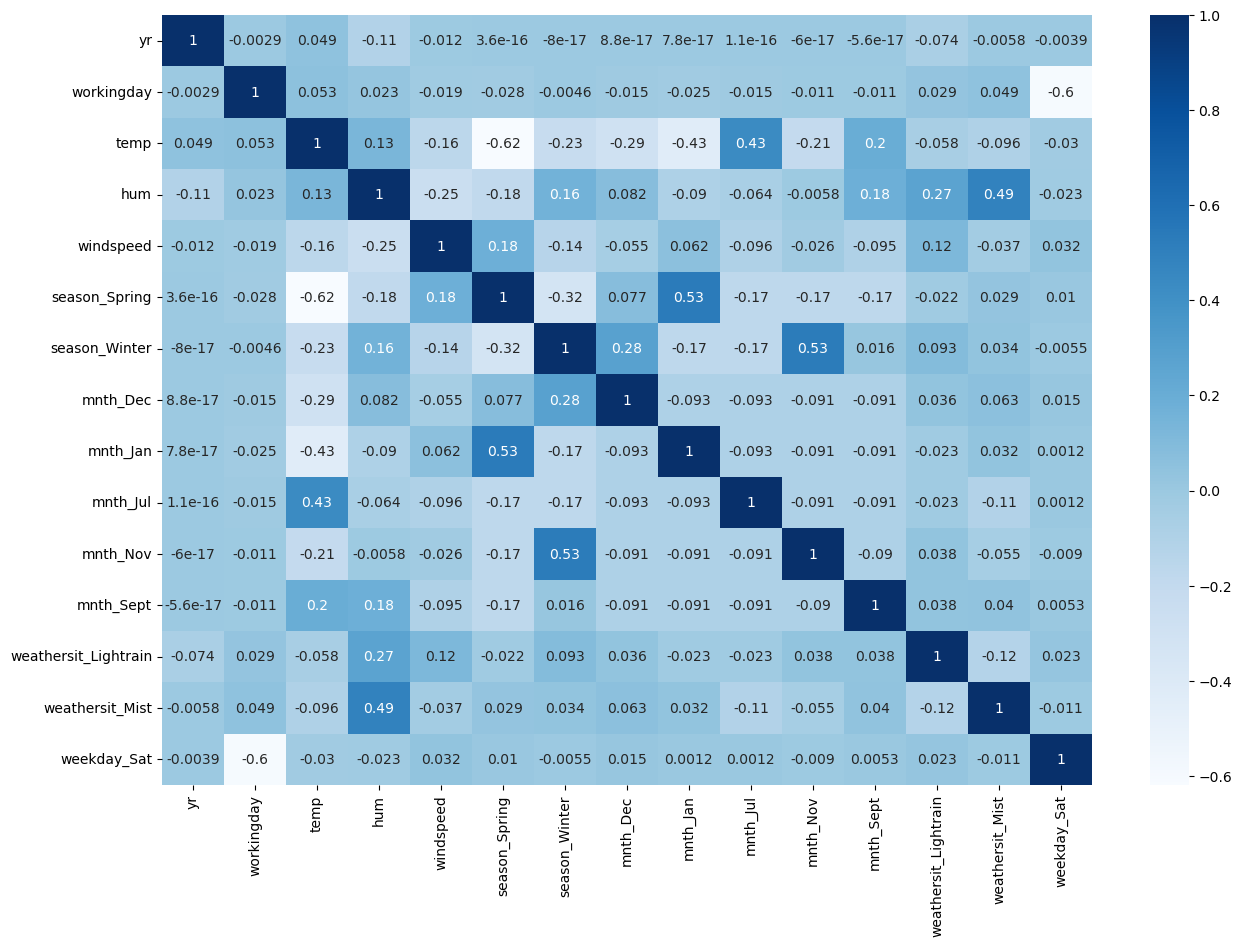

In [73]:
plt.figure(figsize = (15,10))
sns.heatmap(df_bs[selected_features].corr(), cmap = 'Blues', annot = True)

### Model 4
Removing season_winter since VIF relatively higher and correlation with mnth_nov high

In [74]:
X_train_sm=X_train_sm.drop(['season_Winter'],axis=1)
X_test_sm=X_test_sm.drop(['season_Winter'],axis=1)

In [75]:
model4=sm.OLS(y_train,X_train_sm)
res4=model4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     235.7
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          4.17e-212
Time:                        03:28:16   Log-Likelihood:                -4724.3
No. Observations:                 584   AIC:                             9475.
Df Residuals:                     571   BIC:                             9531.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2663.3907    196.043     13.586      0.000    2278.338    3048.443
yr                    2085.5506     66.461     31.380      0.000    1955.012    2216.089
workingday             448.9365     90.186      4.978      0.000     271.800     626.073
temp                  2814.0713    240.184     11.716      0.000    2342.319    3285.824
windspeed            -1009.9700    183.820     -5.494      0.000   -1371.016    -648.924
season_Spring        -1542.9562    113.140    -13.638      0.000   -1765.177   -1320.735
mnth_Dec              -317.2239    126.923     -2.499      0.013    -566.516     -67.932
mnth_Jul              -547.4752    136.796     -4.002      0.000    -816.159    -278.791
mnth_Nov              -309.1687    137.755     -2.244      0.025    -579.736     -38.601
mnth_Sept              490.4322    126.488      3.877      0.000     241.994     738.870
weathersit_Lightrain -2298.9321    207.608    -11.073      0.000   -2706.701   -1891.163
weathersit_Mist       -694.6198     71.786     -9.676      0.000    -835.617    -553.623
weekday_Sat            544.0353    119.414      4.556      0.000     309.491     778.580
==============================================================================
Omnibus:                       61.265   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.550
Skew:                          -0.674   Prob(JB):                     1.20e-23
Kurtosis:                       4.588   Cond. No.                         15.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
X_train=X_train.drop(['season_Winter'],axis=1)

In [77]:
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train.columns

vif_data["VIF"]=[variance_inflation_factor(X_train.values,i) \
                 for i in range(len(X_train.columns))]
vif_data.sort_values(by = 'VIF', ascending = False)

,Feature,VIF
2,temp,7.264275
3,windspeed,5.190399
1,workingday,4.601708
0,yr,1.979808
4,season_Spring,1.814599
11,weekday_Sat,1.691006
10,weathersit_Mist,1.550071
6,mnth_Jul,1.414655
8,mnth_Sept,1.203984
7,mnth_Nov,1.185258


### Model 5
Removing mnth_Nov since p value highest

In [78]:
X_train_sm=X_train_sm.drop(['mnth_Nov'],axis=1)
X_test_sm=X_test_sm.drop(['mnth_Nov'],axis=1)

In [79]:
model5=sm.OLS(y_train,X_train_sm)
res5=model5.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     254.9
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          3.10e-212
Time:                        03:28:21   Log-Likelihood:                -4726.9
No. Observations:                 584   AIC:                             9478.
Df Residuals:                     572   BIC:                             9530.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2464.2765    175.435     14.047      0.000    2119.701    2808.852
yr                    2076.1416     66.563     31.191      0.000    1945.405    2206.878
workingday             450.6208     90.500      4.979      0.000     272.868     628.374
temp                  3053.7144    215.903     14.144      0.000    2629.656    3477.773
windspeed             -995.7662    184.358     -5.401      0.000   -1357.868    -633.664
season_Spring        -1431.0053    101.908    -14.042      0.000   -1631.165   -1230.845
mnth_Dec              -243.5666    123.038     -1.980      0.048    -485.228      -1.905
mnth_Jul              -564.8370    137.058     -4.121      0.000    -834.035    -295.639
mnth_Sept              514.4991    126.476      4.068      0.000     266.084     762.914
weathersit_Lightrain -2312.8149    208.247    -11.106      0.000   -2721.837   -1903.793
weathersit_Mist       -682.8769     71.847     -9.505      0.000    -823.994    -541.760
weekday_Sat            549.5887    119.809      4.587      0.000     314.270     784.908
==============================================================================
Omnibus:                       63.626   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.700
Skew:                          -0.679   Prob(JB):                     1.24e-25
Kurtosis:                       4.694   Cond. No.                         13.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
X_train=X_train.drop(['mnth_Nov'],axis=1)

In [81]:
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train.columns

vif_data["VIF"]=[variance_inflation_factor(X_train.values,i) \
                 for i in range(len(X_train.columns))]
vif_data.sort_values(by = 'VIF', ascending = False)

,Feature,VIF
2,temp,7.073371
3,windspeed,5.019641
1,workingday,4.476181
0,yr,1.946955
4,season_Spring,1.713663
10,weekday_Sat,1.664658
9,weathersit_Mist,1.550036
6,mnth_Jul,1.412864
7,mnth_Sept,1.197666
5,mnth_Dec,1.144466


### Model 6
Removing mnth_Dec since highest p value

In [82]:
X_train_sm=X_train_sm.drop(['mnth_Dec'],axis=1)
X_test_sm=X_test_sm.drop(['mnth_Dec'],axis=1)

In [83]:
model6=sm.OLS(y_train,X_train_sm)
res6=model6.fit()
res6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     278.6
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          1.27e-212
Time:                        03:28:25   Log-Likelihood:                -4728.9
No. Observations:                 584   AIC:                             9480.
Df Residuals:                     573   BIC:                             9528.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2362.6845    168.188     14.048      0.000    2032.345    2693.024
yr                    2069.5222     66.648     31.052      0.000    1938.619    2200.426
workingday             446.6927     90.709      4.924      0.000     268.531     624.855
temp                  3178.0885    207.085     15.347      0.000    2771.351    3584.826
windspeed             -959.8901    183.932     -5.219      0.000   -1321.153    -598.627
season_Spring        -1402.9623    101.176    -13.867      0.000   -1601.682   -1204.242
mnth_Jul              -577.8568    137.248     -4.210      0.000    -847.428    -308.286
mnth_Sept              526.7560    126.646      4.159      0.000     278.009     775.503
weathersit_Lightrain -2332.8336    208.530    -11.187      0.000   -2742.411   -1923.256
weathersit_Mist       -691.7409     71.890     -9.622      0.000    -832.941    -550.541
weekday_Sat            545.2270    120.093      4.540      0.000     309.350     781.104
==============================================================================
Omnibus:                       62.189   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.011
Skew:                          -0.670   Prob(JB):                     7.84e-25
Kurtosis:                       4.664   Cond. No.                         12.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
X_train=X_train.drop(['mnth_Dec'],axis=1)

In [85]:
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train.columns

vif_data["VIF"]=[variance_inflation_factor(X_train.values,i) \
                 for i in range(len(X_train.columns))]
vif_data.sort_values(by = 'VIF', ascending = False)

,Feature,VIF
2,temp,6.973914
3,windspeed,5.013982
1,workingday,4.384430
0,yr,1.926529
4,season_Spring,1.713471
9,weekday_Sat,1.641337
8,weathersit_Mist,1.532279
5,mnth_Jul,1.412779
6,mnth_Sept,1.194790
7,weathersit_Lightrain,1.076121


### Model 7
Removing workingday since (negative) correlated to weekday_Sat and relatively high VIF

In [86]:
X_train_sm=X_train_sm.drop(['workingday'],axis=1)
X_test_sm=X_test_sm.drop(['workingday'],axis=1)

In [87]:
model7=sm.OLS(y_train,X_train_sm)
res7=model7.fit()
res7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     294.9
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          9.97e-209
Time:                        03:28:30   Log-Likelihood:                -4741.0
No. Observations:                 584   AIC:                             9502.
Df Residuals:                     574   BIC:                             9546.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2681.3562    158.353     16.933      0.000    2370.334    2992.378
yr                    2062.1228     67.967     30.340      0.000    1928.629    2195.617
temp                  3231.7970    210.944     15.321      0.000    2817.481    3646.113
windspeed             -949.0344    187.607     -5.059      0.000   -1317.514    -580.555
season_Spring        -1402.0175    103.204    -13.585      0.000   -1604.721   -1199.314
mnth_Jul              -593.8073    139.961     -4.243      0.000    -868.706    -318.908
mnth_Sept              504.2114    129.101      3.906      0.000     250.643     757.780
weathersit_Lightrain -2269.9498    212.313    -10.692      0.000   -2686.954   -1852.945
weathersit_Mist       -660.0591     73.037     -9.037      0.000    -803.512    -516.606
weekday_Sat            188.8339     97.759      1.932      0.054      -3.175     380.842
==============================================================================
Omnibus:                       75.546   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.395
Skew:                          -0.801   Prob(JB):                     2.94e-29
Kurtosis:                       4.683   Cond. No.                         11.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
X_train=X_train.drop(['workingday'],axis=1)

In [89]:
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train.columns

vif_data["VIF"]=[variance_inflation_factor(X_train.values,i) \
                 for i in range(len(X_train.columns))]
vif_data.sort_values(by = 'VIF', ascending = False)

,Feature,VIF
1,temp,5.269667
2,windspeed,4.790604
0,yr,1.921281
3,season_Spring,1.617302
7,weathersit_Mist,1.490347
4,mnth_Jul,1.397609
5,mnth_Sept,1.192653
8,weekday_Sat,1.150117
6,weathersit_Lightrain,1.067231


### Model 8 
Removing weekday_Sat since p value increased

In [90]:
X_train_sm=X_train_sm.drop(['weekday_Sat'],axis=1)
X_test_sm=X_test_sm.drop(['weekday_Sat'],axis=1)

In [91]:
model8=sm.OLS(y_train,X_train_sm)
res8=model8.fit()
res8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     329.7
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          3.40e-209
Time:                        03:28:37   Log-Likelihood:                -4742.9
No. Observations:                 584   AIC:                             9504.
Df Residuals:                     575   BIC:                             9543.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2720.1170    157.449     17.276      0.000    2410.871    3029.363
yr                    2058.8921     68.107     30.230      0.000    1925.123    2192.662
temp                  3218.1931    211.326     15.229      0.000    2803.127    3633.259
windspeed             -947.8129    188.051     -5.040      0.000   -1317.163    -578.463
season_Spring        -1409.4194    103.378    -13.634      0.000   -1612.463   -1206.376
mnth_Jul              -595.6916    140.290     -4.246      0.000    -871.235    -320.148
mnth_Sept              510.1090    129.371      3.943      0.000     256.011     764.207
weathersit_Lightrain -2277.3275    212.782    -10.703      0.000   -2695.252   -1859.403
weathersit_Mist       -665.9995     73.146     -9.105      0.000    -809.665    -522.334
==============================================================================
Omnibus:                       69.218   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              118.940
Skew:                          -0.748   Prob(JB):                     1.49e-26
Kurtosis:                       4.628   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
X_train=X_train.drop(['weekday_Sat'],axis=1)

In [93]:
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train.columns

vif_data["VIF"]=[variance_inflation_factor(X_train.values,i) \
                 for i in range(len(X_train.columns))]
vif_data.sort_values(by = 'VIF', ascending = False)

,Feature,VIF
1,temp,5.208020
2,windspeed,4.766192
0,yr,1.921280
3,season_Spring,1.615198
7,weathersit_Mist,1.489970
4,mnth_Jul,1.395957
5,mnth_Sept,1.192133
6,weathersit_Lightrain,1.067182


### Model 9
Remove season_Spring since relatively high correlation to temp

In [152]:
X_train_sm=X_train_sm.drop(['season_Spring'],axis=1)
X_test_sm=X_test_sm.drop(['season_Spring'],axis=1)

In [153]:
model9=sm.OLS(y_train,X_train_sm)
res9=model9.fit()
res9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     265.2
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          1.52e-175
Time:                        13:30:47   Log-Likelihood:                -4824.7
No. Observations:                 584   AIC:                             9665.
Df Residuals:                     576   BIC:                             9700.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1578.0879    153.227     10.299      0.000    1277.137    1879.039
yr                    2041.9110     78.265     26.090      0.000    1888.191    2195.630
temp                  4941.0746    194.674     25.381      0.000    4558.717    5323.433
windspeed            -1259.6618    214.528     -5.872      0.000   -1681.015    -838.309
mnth_Jul              -868.0805    159.597     -5.439      0.000   -1181.543    -554.618
mnth_Sept              550.4518    148.652      3.703      0.000     258.486     842.417
weathersit_Lightrain -2068.8730    243.925     -8.482      0.000   -2547.965   -1589.781
weathersit_Mist       -658.5728     84.067     -7.834      0.000    -823.687    -493.458
==============================================================================
Omnibus:                       15.952   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.618
Skew:                          -0.381   Prob(JB):                     0.000246
Kurtosis:                       3.319   Cond. No.                         9.26
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [154]:
X_train=X_train.drop(['season_Spring'],axis=1)

In [155]:
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train.columns

vif_data["VIF"]=[variance_inflation_factor(X_train.values,i) \
                 for i in range(len(X_train.columns))]
vif_data.sort_values(by = 'VIF', ascending = False)

,Feature,VIF
1,temp,4.596777
2,windspeed,3.579606
0,yr,1.883140
6,weathersit_Mist,1.467045
3,mnth_Jul,1.394091
4,mnth_Sept,1.190243
5,weathersit_Lightrain,1.066222


<Axes: >

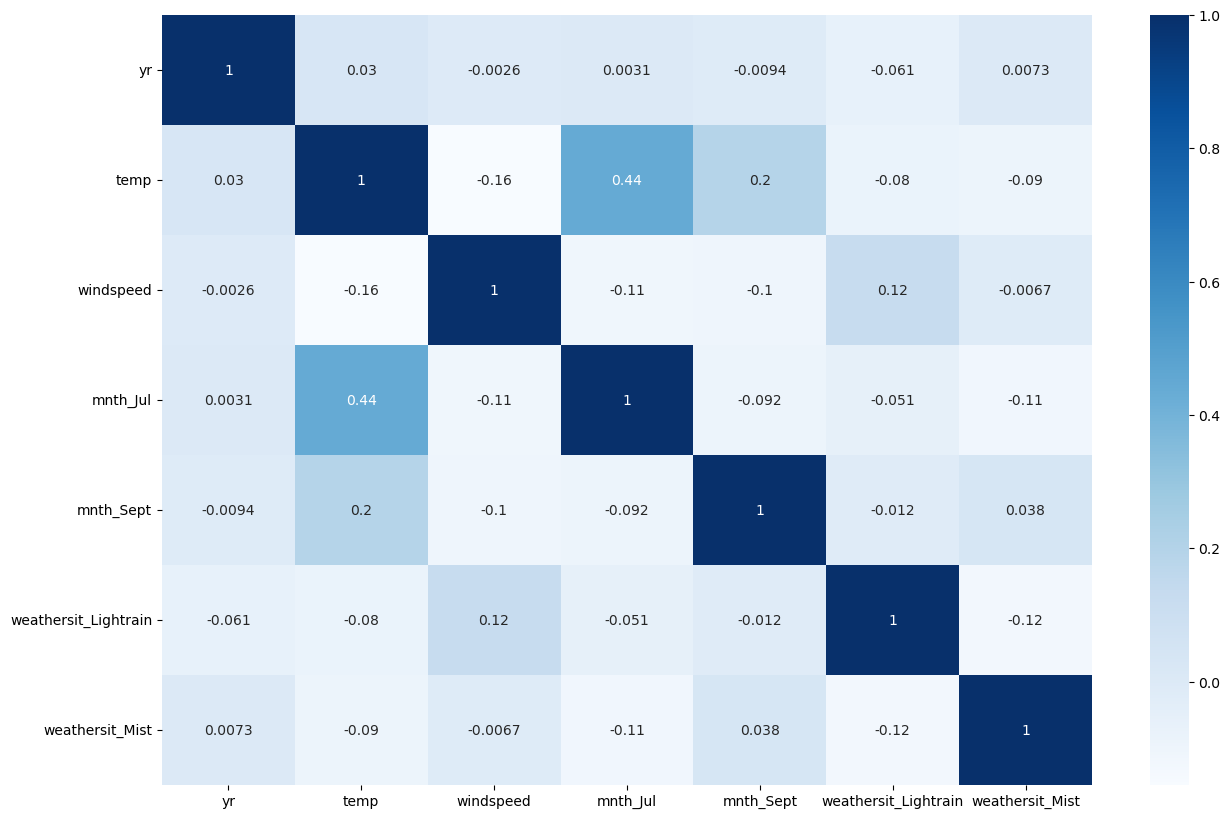

In [156]:
plt.figure(figsize = (15,10))
sns.heatmap(X_train.corr(), cmap = 'Blues', annot = True)

### Model 10
Removing mnth_Jul since highly correlated to temp

In [157]:
X_train_sm=X_train_sm.drop(['mnth_Jul'],axis=1)
X_test_sm=X_test_sm.drop(['mnth_Jul'],axis=1)

In [158]:
model10=sm.OLS(y_train,X_train_sm)
res10=model10.fit()
res10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     290.0
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          1.51e-170
Time:                        13:30:51   Log-Likelihood:                -4839.3
No. Observations:                 584   AIC:                             9693.
Df Residuals:                     577   BIC:                             9723.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1712.3691    154.925     11.053      0.000    1408.083    2016.656
yr                    2048.3517     80.171     25.550      0.000    1890.889    2205.814
temp                  4459.5657    177.625     25.107      0.000    4110.696    4808.436
windspeed            -1193.7962    219.428     -5.441      0.000   -1624.771    -762.822
mnth_Sept              714.1949    149.134      4.789      0.000     421.283    1007.106
weathersit_Lightrain -2040.5846    249.838     -8.168      0.000   -2531.287   -1549.883
weathersit_Mist       -623.7915     85.874     -7.264      0.000    -792.456    -455.127
==============================================================================
Omnibus:                       15.690   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.256
Skew:                          -0.383   Prob(JB):                     0.000295
Kurtosis:                       3.285   Cond. No.                         9.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [159]:
X_train=X_train.drop(['mnth_Jul'],axis=1)

In [160]:
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train.columns

vif_data["VIF"]=[variance_inflation_factor(X_train.values,i) \
                 for i in range(len(X_train.columns))]
vif_data.sort_values(by = 'VIF', ascending = False)

,Feature,VIF
1,temp,3.526537
2,windspeed,3.422344
0,yr,1.877538
5,weathersit_Mist,1.446010
3,mnth_Sept,1.143076
4,weathersit_Lightrain,1.065185


In [161]:
res10.params

const                   1712.369074
yr                      2048.351707
temp                    4459.565666
windspeed              -1193.796231
mnth_Sept                714.194883
weathersit_Lightrain   -2040.584636
weathersit_Mist         -623.791487
dtype: float64

###  Model Selection
Comparing Model 8, 9 and 10 since VIF is acceptable range and no high p values.

1. 8 - Slightly higher VIF but also highest R2.
2. 9 - Lower VIF but R2 also dropped.
3. 10 - Lower VIF but R2 further dropped.

Selecting Model 10 basis VIF + R2 comparison

### Model Evaluation

In [94]:
y_train_pred = res8.predict(X_train_sm)

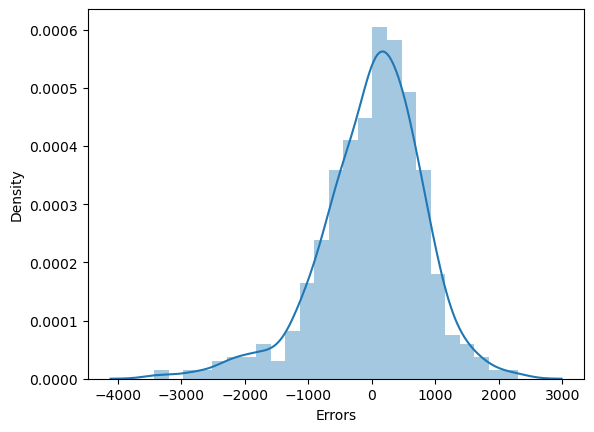

In [95]:
sns.distplot(y_train - y_train_pred)
plt.xlabel('Errors')
plt.show()


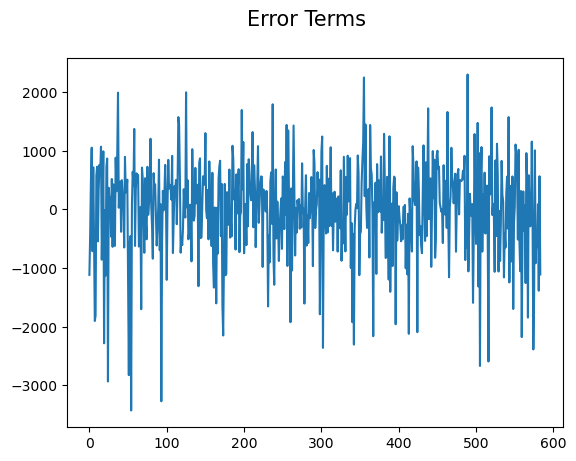

In [96]:
# Error Terms

e = [i for i in range(0, len(X_train),1)]
plt.plot(e,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.show()

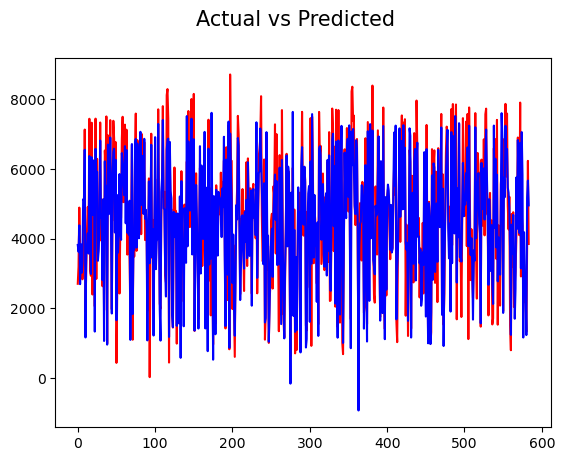

In [97]:
# Error Terms

e = [i for i in range(0, len(X_train),1)]
plt.plot(e,y_train, color = 'red')
plt.plot(e,y_train_pred,  color = 'blue')
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.show()

Actual and Predicted patterns are almost the same

### Observations
No specific pattern in Error Terms.
Residuals are normally distributed hence linear regression assumption is valid.

### Final Predictions

In [103]:
num_cols_scaling1 = ['temp','windspeed']
scaler = MinMaxScaler()
X_test_sm[num_cols_scaling1] = scaler.fit_transform(X_test_sm[num_cols_scaling1])

In [104]:
X_test_sm.shape

(146, 9)

In [105]:
y_test.shape

(146,)

In [106]:
y_test_pred = res8.predict(X_test_sm)

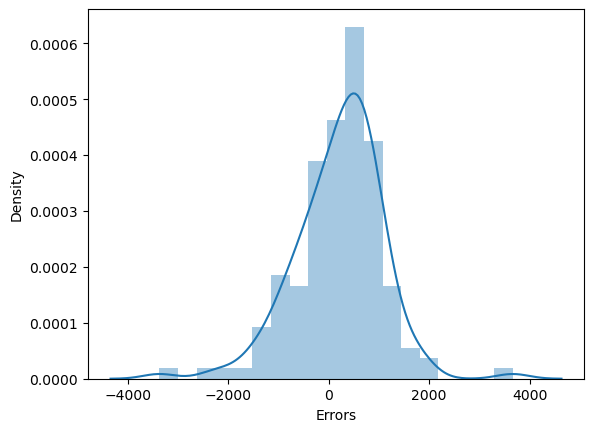

In [107]:
sns.distplot(y_test - y_test_pred)
plt.xlabel('Errors')
plt.show()

In [108]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.7923886059542278

#### R2 similar to selected Model 8

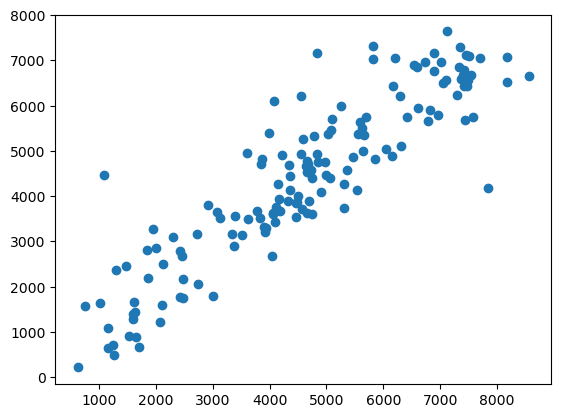

In [109]:
plt.scatter(y_test, y_test_pred)

In [110]:
res8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     329.7
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          3.40e-209
Time:                        03:29:53   Log-Likelihood:                -4742.9
No. Observations:                 584   AIC:                             9504.
Df Residuals:                     575   BIC:                             9543.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2720.1170    157.449     17.276      0.000    2410.871    3029.363
yr                    2058.8921     68.107     30.230      0.000    1925.123    2192.662
temp                  3218.1931    211.326     15.229      0.000    2803.127    3633.259
windspeed             -947.8129    188.051     -5.040      0.000   -1317.163    -578.463
season_Spring        -1409.4194    103.378    -13.634      0.000   -1612.463   -1206.376
mnth_Jul              -595.6916    140.290     -4.246      0.000    -871.235    -320.148
mnth_Sept              510.1090    129.371      3.943      0.000     256.011     764.207
weathersit_Lightrain -2277.3275    212.782    -10.703      0.000   -2695.252   -1859.403
weathersit_Mist       -665.9995     73.146     -9.105      0.000    -809.665    -522.334
==============================================================================
Omnibus:                       69.218   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              118.940
Skew:                          -0.748   Prob(JB):                     1.49e-26
Kurtosis:                       4.628   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Final Observations
Linear Relationship established.
Significant Variables 
1. temp
2. windspeed
3. yr
4. weathersit_Mist
5. mnth_Jul
6. mnth_Sept
7. weathersit_Lightrain
8. season_Spring
